## Least-squares estimator, Recursive least-squares estimator, Stochastic differential equation, and Kalman Filter
By S Ganga Prasath, Vishaal Vasan - on 16-May-2023

In [1]:
# Import required libraries for numerical methods, plotting
import numpy as np
from pylab import *
from scipy import *
import matplotlib as mpl
import matplotlib.pyplot as plt
# Specific imports
from scipy.interpolate import griddata
%matplotlib inline

In [2]:
# Colors used in the plots
colors = {
    "gray": {
        0: "#f8f9fa",
        1: "#f1f3f5",
        2: "#e9ecef",
        3: "#dee2e6",
        4: "#ced4da",
        5: "#adb5bd",
        6: "#868e96",
        7: "#495057",
        8: "#343a40",
        9: "#212529",
    },
    "red": {
        0: "#fff5f5",
        1: "#ffe3e3",
        2: "#ffc9c9",
        3: "#ffa8a8",
        4: "#ff8787",
        5: "#ff6b6b",
        6: "#fa5252",
        7: "#f03e3e",
        8: "#e03131",
        9: "#c92a2a",
    },
    "pink": {
        0: "#fff0f6",
        1: "#ffdeeb",
        2: "#fcc2d7",
        3: "#faa2c1",
        4: "#f783ac",
        5: "#f06595",
        6: "#e64980",
        7: "#d6336c",
        8: "#c2255c",
        9: "#a61e4d",
    },
    "grape": {
        0: "#f8f0fc",
        1: "#f3d9fa",
        2: "#eebefa",
        3: "#e599f7",
        4: "#da77f2",
        5: "#cc5de8",
        6: "#be4bdb",
        7: "#ae3ec9",
        8: "#9c36b5",
        9: "#862e9c",
    },
    "violet": {
        0: "#f3f0ff",
        1: "#e5dbff",
        2: "#d0bfff",
        3: "#b197fc",
        4: "#9775fa",
        5: "#845ef7",
        6: "#7950f2",
        7: "#7048e8",
        8: "#6741d9",
        9: "#5f3dc4",
    },
    "indigo": {
        0: "#edf2ff",
        1: "#dbe4ff",
        2: "#bac8ff",
        3: "#91a7ff",
        4: "#748ffc",
        5: "#5c7cfa",
        6: "#4c6ef5",
        7: "#4263eb",
        8: "#3b5bdb",
        9: "#364fc7",
    },
    "blue": {
        0: "#e7f5ff",
        1: "#d0ebff",
        2: "#a5d8ff",
        3: "#74c0fc",
        4: "#4dabf7",
        5: "#339af0",
        6: "#228be6",
        7: "#1c7ed6",
        8: "#1971c2",
        9: "#1864ab",
    },
    "cyan": {
        0: "#e3fafc",
        1: "#c5f6fa",
        2: "#99e9f2",
        3: "#66d9e8",
        4: "#3bc9db",
        5: "#22b8cf",
        6: "#15aabf",
        7: "#1098ad",
        8: "#0c8599",
        9: "#0b7285",
    },
    "teal": {
        0: "#e6fcf5",
        1: "#c3fae8",
        2: "#96f2d7",
        3: "#63e6be",
        4: "#38d9a9",
        5: "#20c997",
        6: "#12b886",
        7: "#0ca678",
        8: "#099268",
        9: "#087f5b",
    },
    "green": {
        0: "#ebfbee",
        1: "#d3f9d8",
        2: "#b2f2bb",
        3: "#8ce99a",
        4: "#69db7c",
        5: "#51cf66",
        6: "#40c057",
        7: "#37b24d",
        8: "#2f9e44",
        9: "#2b8a3e",
    },
    "lime": {
        0: "#f4fce3",
        1: "#e9fac8",
        2: "#d8f5a2",
        3: "#c0eb75",
        4: "#a9e34b",
        5: "#94d82d",
        6: "#82c91e",
        7: "#74b816",
        8: "#66a80f",
        9: "#5c940d",
    },
    "yellow": {
        0: "#fff9db",
        1: "#fff3bf",
        2: "#ffec99",
        3: "#ffe066",
        4: "#ffd43b",
        5: "#fcc419",
        6: "#fab005",
        7: "#f59f00",
        8: "#f08c00",
        9: "#e67700",
    },
    "orange": {
        0: "#fff4e6",
        1: "#ffe8cc",
        2: "#ffd8a8",
        3: "#ffc078",
        4: "#ffa94d",
        5: "#ff922b",
        6: "#fd7e14",
        7: "#f76707",
        8: "#e8590c",
        9: "#d9480f",
    },
    "mixed": {
        0: "#880e4f",
        1: "#1a237e",
        2: "#e65100",
        3: "#004d40",
        4: "#c92a2a",
    },
}

## Least-squares estimator

In [3]:
# Function defining template vector f(t) in the article
def fun(t):
    return ([t, t**1.5/10, t**2/100, t**4/1000])

/var/folders/hq/qfn7h8h16pvdp93670td9g8w0000gn/T/ipykernel_4007/4284633388.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels)


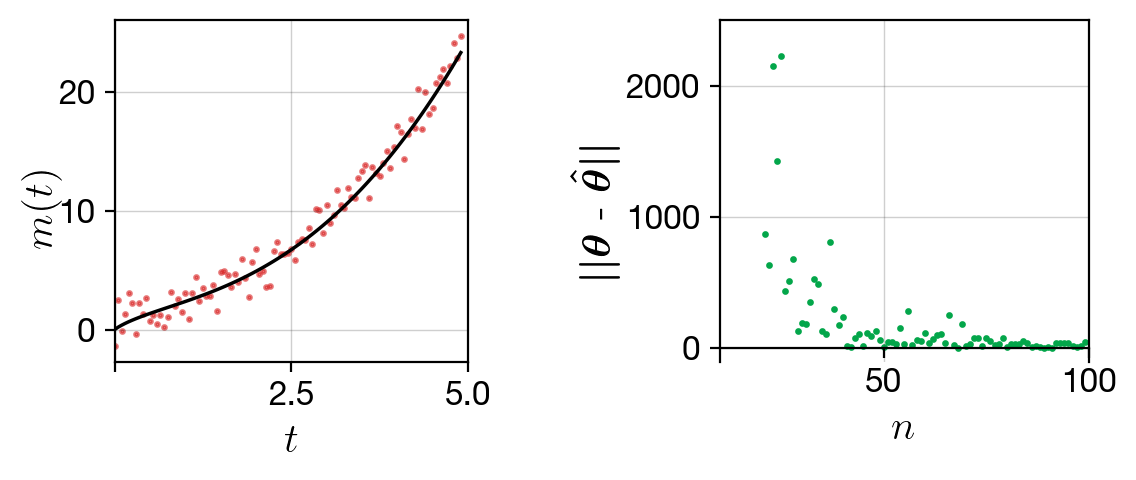

In [17]:
# Plot setup
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rc("font", family="Helvetica Neue")
plt.rc("xtick", labelsize="large")
plt.rc("ytick", labelsize="large")

# Scatter colors
sc1Color = "#D92727"
sc2Color = "#03A64A"

# Statistical properties of noise
mean = 0
std = 1

fig = plt.figure(figsize=(6, 2.5), dpi=200)
ax1 = plt.subplot(1, 2, 1) #Plot showing fit to data
ax2 = plt.subplot(1, 2, 2) #Plot showing error vs number of samples

# Computing error in fit vs number of samples
for nSamples in np.arange(20,100):
    nos = np.random.normal(mean, std, size=nSamples)

    alpha = np.zeros([nSamples,4])
    for ind in np.arange(nSamples+1):
        alpha[ind-1,:] = fun(0.1*ind)
    theta = np.ones([4,1])
    
    m = np.dot(alpha,theta)+ np.reshape(nos,[nSamples,1])

    hL = np.dot(np.linalg.inv(np.dot(np.transpose(alpha),alpha)),np.transpose(alpha))
    thetaLSE = np.dot(hL,m)
    eps = np.linalg.norm(thetaLSE - theta)
    ax2.scatter(nSamples,eps,color=sc2Color,s=2)
ax2.set_xlabel(r'$n$', usetex=True, fontsize=15)
ax2.set_ylabel(r'\boldmath$||\theta$ - $\hat{\theta}||$', usetex=True, fontsize=15)
ax2.yaxis.set_label_coords(-0.27,0.45)
ax2.spines["left"].set_position(("data", 10))
ax2.spines["bottom"].set_position(("data", 0))
ax2.set_aspect(0.8*10/250)
ax2.grid(linestyle="-", linewidth=0.5, color=".25", alpha=0.25, zorder=-10)
ax2.set_xlim([10.0,100.0])
ax2.set_ylim([-100,2500])

# Sample plot showing fit to data
ax1.scatter(0.1*np.arange(nSamples), m, color=sc1Color, alpha=0.6, s=2)
tFit = 0.1*np.arange(nSamples)
zFit = np.dot(np.transpose(fun(tFit)),thetaLSE)
ax1.plot(tFit,zFit,'k',linewidth=1.25)
ax1.set_xlim([0.0,10.0])
ax1.set_xlabel(r'$t$', usetex=True, fontsize=15)
ax1.set_ylabel(r'$m(t)$', usetex=True, fontsize=15)
ax1.yaxis.set_label_coords(-0.15,0.45)
ax1.set_aspect(0.8*np.max(tFit)/np.max(zFit))
labels = ax1.get_xticklabels()
labels[0] = ""
ax1.set_xticklabels(labels)
ax1.grid(linestyle="-", linewidth=0.5, color=".25", alpha=0.25, zorder=-10)
    
plt.tight_layout()
# plt.savefig("./lse.pdf")
plt.show()

## Recursive least-squares estimator

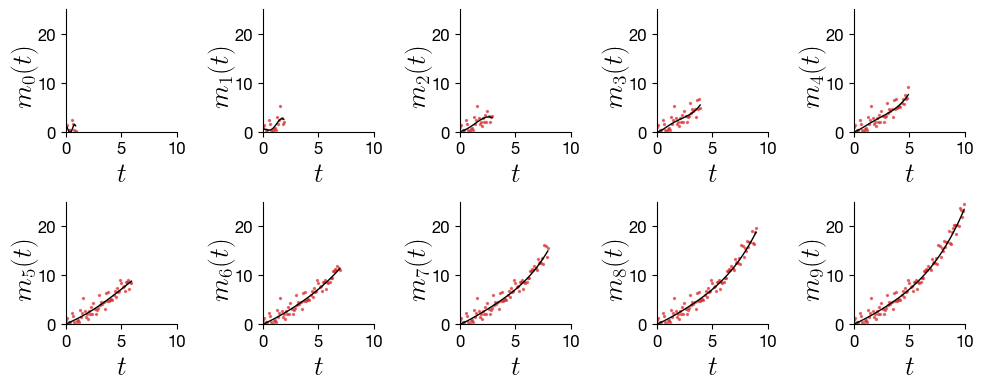

In [59]:
# Plot setup
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rc("font", family="Helvetica Neue")
plt.rc("xtick", labelsize="large")
plt.rc("ytick", labelsize="large")
cycler_op1 = cycler('color', ['r', 'g', 'b', 'y', 'c', 'k']) \
            * cycler('linestyle', ['-', '--', ':', '-.', '-', '--'])

cycler_op2 = cycler('linestyle', ['-', '--', ':', '-.', '-', '--']) \
            * cycler('color', ['r', 'g', 'b', 'y', 'c', 'k'])

plt.rc('axes', prop_cycle = cycler_op1 )
scColor = "#D92727"

# Statistical properties of noise
mean = 0
std = 1

fig = plt.figure(figsize=(10,4), dpi=100)

nSamples = 100
nDiv = 10

nosFull = np.random.normal(mean, std, size=nSamples)
alphaFull = np.zeros([nSamples,4])
thetaFull = np.ones([4,1])
for ind in np.arange(nSamples+1):
    alphaFull[ind-1,:] = fun(0.1*ind)
mFull = np.dot(alphaFull,thetaFull)+ np.reshape(nosFull,[nSamples,1])


selInd = np.linspace(10,nSamples,nDiv)
for jInd in np.arange(nDiv):
    ax = plt.subplot(2, int(nDiv/2), jInd+1)
    ax.set_xlim([0.0,10.0])
    ax.set_ylim([0,25])
    alphaj = alphaFull[0:int(selInd[jInd]),:]
    mj = mFull[0:int(selInd[jInd]),:]
    if jInd==0:
        betaj = np.linalg.inv(np.dot(np.transpose(alphaj),alphaj))
        thetaj = np.dot(betaj,np.dot(np.transpose(alphaj),mj))
    else:
        opj = np.eye(int(selInd[jInd])) + np.dot(alphaj,np.dot(betajp,np.transpose(alphaj)))
        kappaj = np.dot(betajp,np.dot(np.transpose(alphaj),np.linalg.inv(opj)))
        betaj = np.linalg.inv(np.linalg.inv(betajp) + np.dot(np.transpose(alphaj),alphaj))
        thetaj = thetajp + np.dot(kappaj,(mj-np.dot(alphaj,thetajp)))
        
    ax.scatter(0.1*np.arange(selInd[jInd]), mj,
               color=scColor, 
               alpha=0.6, 
               s=2)
    tFit = 0.1*np.arange(selInd[jInd])
    mFit = np.dot(np.transpose(fun(tFit)),thetaj)
    ax.plot(tFit,mFit,'k',linewidth=1)

    betajp = betaj
    thetajp = thetaj

    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_position(("data", 0))
    ax.spines["bottom"].set_position(("data", 0))
    ax.set_xlabel(r'$t$', usetex=True, fontsize=20)
    axNm = '$m_'+str(jInd)+'(t)$'
    ax.set_ylabel(axNm, usetex=True, fontsize=20)
    ax.yaxis.set_label_coords(-0.25,0.45)
    
plt.tight_layout()
plt.savefig("./rlse.pdf")
plt.show()

## Dynamics of 1D linear ODE with constant coefficients

In [60]:
# Function showing different behaviors of a linear 1D differential equation
def solOde(a, b, yo):
    Npt = 100
    tmax = 5
    yOde = np.zeros([Npt, 1])
    t = np.linspace(0,tmax,Npt)
    for ind in np.arange(Npt):
        if (a != 0.0):
            yOde[ind] = (-b + (a*yo + b)*np.exp(a*t[ind]))/a
        else:
            yOde[ind] = b*t[ind] + yo
    return [yOde, np.reshape(t,[Npt,1])]

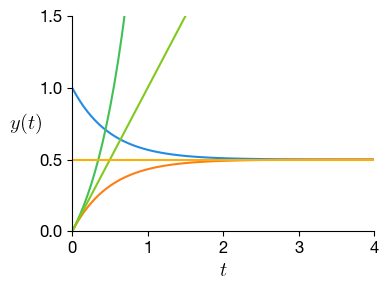

In [64]:
# Plot setup
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rc("font", family="Helvetica Neue")
plt.rc("xtick", labelsize="large")
plt.rc("ytick", labelsize="large")

fig = plt.figure(figsize=(4,3), dpi=100)
ax = plt.subplot()
ax.set_xlim([0.0,4.0])
ax.set_ylim([0.0,1.5])

[ySol, t] = solOde(-2,1,1)
ax.plot(t, ySol, color=colors['blue'][6])
[ySol, t] = solOde(2,1,0)
ax.plot(t, ySol, color=colors['green'][6])
[ySol, t] = solOde(-2,1,0)
ax.plot(t, ySol, color=colors['orange'][6])
[ySol, t] = solOde(0,1,0)
ax.plot(t, ySol, color=colors['lime'][6])
[ySol, t] = solOde(0,0,0.5)
ax.plot(t, ySol, color=colors['yellow'][6])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_position(("data", 0))
ax.spines["bottom"].set_position(("data", 0))
ax.set_xlabel(r'$t$', usetex=True, fontsize=15)
ax.set_ylabel(r'$y(t)$', usetex=True, rotation=0, fontsize=15)
ax.yaxis.set_label_coords(-0.15,0.45)

ax.set_yticks([0, 0.5, 1, 1.5])
plt.tight_layout()
plt.show()

## Dynamics of an 1D SDE representing Ornstein Uhlenbeck process
Dynamical system: $ dy(t) = a \ y(t) + dw(t)$

$ a < 0, \mathbb{E}[w(t)] = 0, \mathbb{E}[w(t)w(t')] = 2D \delta(t-t')$.

Using Euler-Murayama method, we can discretize the equation to get

$y_{n+1} = y_n (1+a\Delta t) + \sqrt{2D \Delta t} \ \eta_n$

where $\eta_n$ is white-noise sampled from standard normal distribution $\sim \mathcal{N(0,1)}$.

/var/folders/hq/qfn7h8h16pvdp93670td9g8w0000gn/T/ipykernel_85889/3454818948.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels)


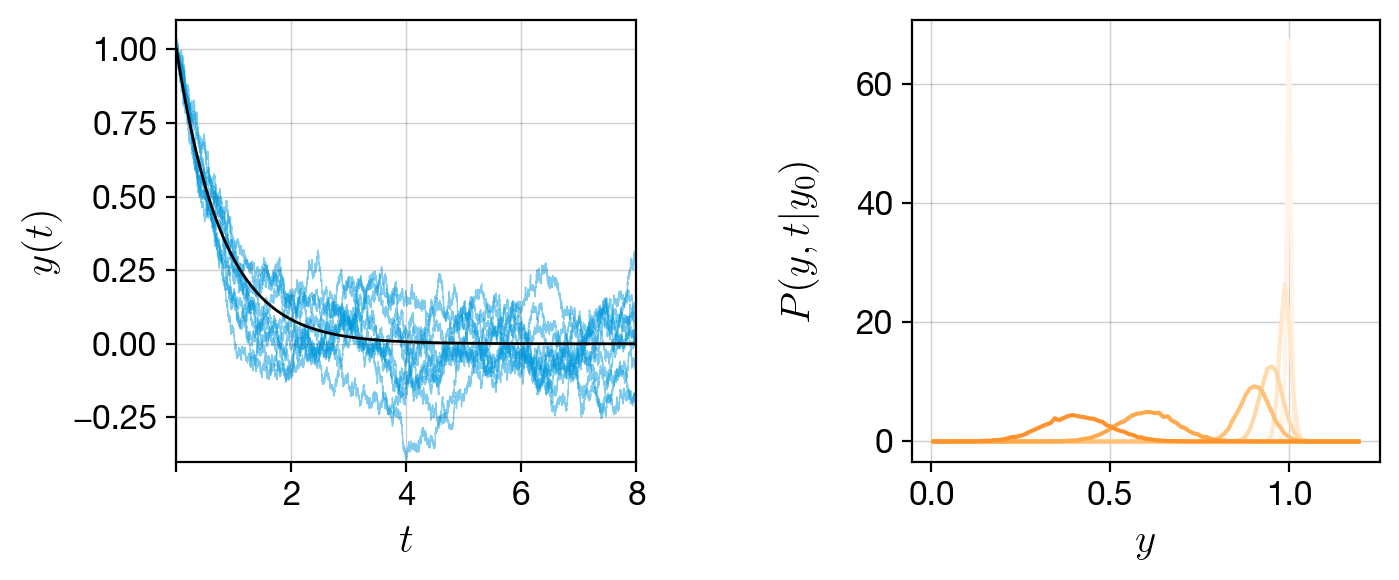

In [100]:
# Plot setup
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rc("font", family="Helvetica Neue")
plt.rc("xtick", labelsize="large")
plt.rc("ytick", labelsize="large")
lcolor = "#0099DD"

# Parameters in the stochastic differential equation & numerical method
diffCoeff = 1.e-2 # Diffusion coefficient
sigma = np.sqrt(2.0*diffCoeff) # Standard deviation
a = -1. # Constant in SDE
y0 = 1.0 # Initial condition
dt = .001  # Time step
T = 10.  # Total time
reps = 10 # Number of simulations
n = int(T / dt)  # Number of time steps
t = np.linspace(0., T, n)  # Vector of time
sqrtdt = np.sqrt(dt)
const = sigma*sqrtdt

fig = plt.figure(figsize=(8,3), dpi=200)
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
ax1.set_xlim([0,10.])
ax1.set_ylim([-0.4,1.1])

for k in range(reps):
    y = np.zeros(n)
    y[0] = 1.0
    for i in range(n - 1):
        y[i + 1] = y[i]*(1 + a*dt) + const * np.random.randn()
    ax1.plot(t, y, lw=0.5, color=lcolor, alpha=0.5, zorder=-1)
ax1.plot(t, y0*exp(a*t), lw=1, c='k') # Solution for the mean evolution

ax1.set_xlabel(r'$t$', usetex=True, fontsize=15)
ax1.set_ylabel(r'$y(t)$', usetex=True, fontsize=15)
ax1.yaxis.set_label_coords(-0.25,0.5)
labels = ax1.get_xticklabels()
labels[0] = ""
ax1.set_xticklabels(labels)
ax1.set_aspect(0.8*8)
ax1.grid(linestyle="-", linewidth=0.5, color=".25", alpha=0.25, zorder=-10)

# Simulating evolution of probability density function of y(t)
reps = 20000
Y = np.zeros(reps) + y0
bins = np.linspace(0, y0+0.2, 100)
cInd = 6
for ind in range(n):
    Y += dt * (a*Y) + const * np.random.randn(reps)
    if ind in (0, 10, 50, 100, 500, 900):
        hist, _ = np.histogram(Y, bins=bins, density='True')
        ax2.plot((bins[1:] + bins[:-1]) / 2, hist, color=colors['orange'][6-cInd])
        cInd -= 1

ax2.set_xlabel(r'$y$', usetex=True, fontsize=15)
ax2.set_ylabel(r'$P(y,t|y_0)$', usetex=True, fontsize=15)
ax2.yaxis.set_label_coords(-0.2,0.5)
ax2.set_aspect(1/60)
ax2.grid(linestyle="-", linewidth=0.5, color=".25", alpha=0.25, zorder=-10)

plt.subplots_adjust(bottom=0.25)
plt.savefig("./sde.pdf")
plt.tight_layout()
plt.show()

## Estimation of the position of a particle in a harmonic potential
Langevin equation : $ dx(t) = -({\omega^2}/{\gamma}) x \ dt + dw(t)$

where $ \mathbb{E}[w(t)] = 0, \mathbb{E}[w(t)w(t')] = q \delta(t-t'), q = 2 k_B T/\gamma m$.

/var/folders/hq/qfn7h8h16pvdp93670td9g8w0000gn/T/ipykernel_85889/1262725875.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels)
/var/folders/hq/qfn7h8h16pvdp93670td9g8w0000gn/T/ipykernel_85889/1262725875.py:90: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels)


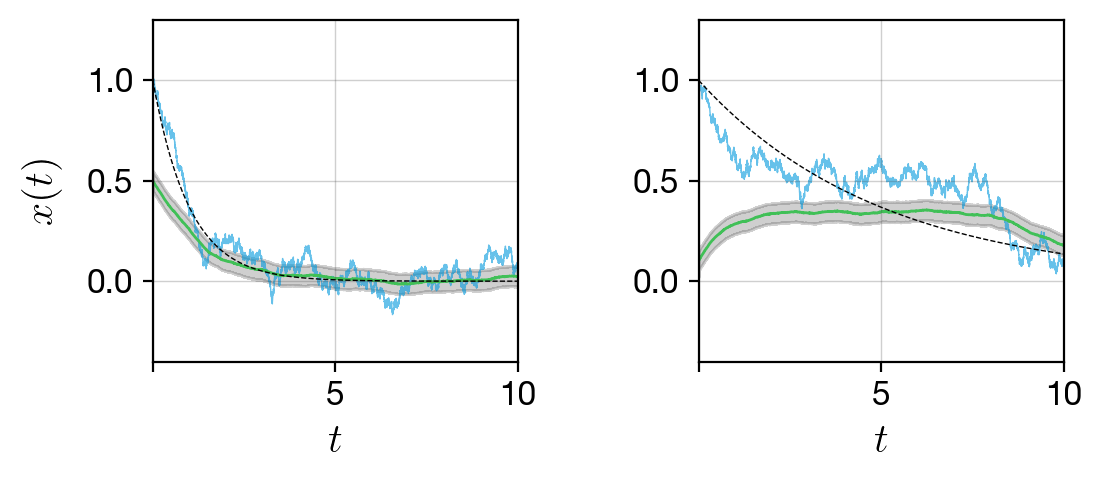

In [144]:
# Plot setup
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rc("font", family="Helvetica Neue")
plt.rc("xtick", labelsize="large")
plt.rc("ytick", labelsize="large")
scColor = "#D92727"
lcolor = "#0099DD"

# Parameters in SDE and numerical scheme
q = 0.01 # Constant in SDE
f = -0.5 # Constant in SDE (\omega^2/\gamma)
x0 = 1.0 # Initial condition
alpha = 0.2 # Measurement constant
r = 0.01 # Measurement noise variance
dt = .001  # Time step
T = 20.  # Total time
n = int(T / dt)  # Number of time steps
t = np.linspace(0., T, n)  # Vector of time
sqrtdt = np.sqrt(dt)
const = np.sqrt(q)*sqrtdt

fig = plt.figure(figsize=(6,2.5), dpi=200)
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
ax1.set_xlim([0,T])
ax1.set_ylim([-0.4,1.3])
ax2.set_xlim([0,T])
ax2.set_ylim([-0.4,1.3])

x = np.zeros(n) # State vector
xt = np.zeros(n) # Estimate of state vector
beta = np.zeros(n) # Variance estimation
kap = np.zeros(n) # Kalman gain
z = np.zeros(n) # Measurement

x[0] = x0 # State initialization
xt[0] = 0.5 # State estimate initialization
beta[0] = 0.01 # Variance initialization
kap[0] = beta[0]*alpha/r # Kalman gain initialization
for i in range(n - 1):
    # State evolution
    x[i+1] = x[i]*(1 + f*dt) + const * np.random.randn()
    # Measurement
    z[i] = alpha*x[i] + np.sqrt(r) * np.random.randn()
    # Variance update
    beta[i+1] = beta[i]*(1 + 2*f*dt) + q - r*pow(kap[i],2)
    # Kalman gain computation
    kap[i+1] = beta[i+1]*alpha/r
     # State estimate update
    xt[i+1] = xt[i]*(1 + f*dt) + dt*kap[i+1]*(z[i] - alpha*xt[i])
ax1.plot(t, x, lw=0.5, color=lcolor, alpha=0.6, zorder=-1)
ax1.plot(t, xt, lw=1, color=colors['green'][6], zorder=-1)
ax1.plot(t, x0*exp(f*t), lw=0.5, c='k', ls='dashed') # Solution for the mean evolution
ax1.fill_between(t, xt-beta, xt+beta, zorder=-2, color=".25", alpha=0.25) # Error bar obtained from variance

ax1.set_xlabel(r'$t$', usetex=True, fontsize=15)
ax1.set_ylabel(r'$x(t)$', usetex=True, fontsize=15)
ax1.yaxis.set_label_coords(-0.25,0.5)
labels = ax1.get_xticklabels()
labels[0] = ""
ax1.set_xticklabels(labels)
ax1.grid(linestyle="-", linewidth=0.5, color=".25", alpha=0.25, zorder=-10)
ax1.set_aspect(0.55*20)

f = -0.1 # Constant in SDE (\omega^2/\gamma)
x[0] = x0 # State initialization
xt[0] = 0.1 # State estimate initialization
beta[0] = 0.08 # Variance initialization
kap[0] = beta[0]*alpha/r # Kalman gain initialization
for i in range(n - 1):
    # State evolution
    x[i+1] = x[i]*(1 + f*dt) + const * np.random.randn()
    # Measurement
    z[i] = alpha*x[i] + np.sqrt(r) * np.random.randn()
    # Variance update
    beta[i+1] = beta[i]*(1 + 2*f*dt) + q - r*pow(kap[i],2)
    # Kalman gain computation
    kap[i+1] = beta[i+1]*alpha/r
     # State estimate update
    xt[i+1] = xt[i]*(1 + f*dt) + dt*kap[i+1]*(z[i] - alpha*xt[i])
ax2.plot(t, x, lw=0.5, color=lcolor, alpha=0.6, zorder=-1) # True state evolution
ax2.plot(t, xt, lw=1, color=colors['green'][6], zorder=-1) # KF estimated state evolution
ax2.plot(t, x0*exp(f*t), lw=0.5, c='k', ls='dashed') # Solution for the mean evolution
ax2.fill_between(t, xt-beta, xt+beta, zorder=-2, color=".25", alpha=0.25) # Error bar obtained from variance

ax2.set_xlabel(r'$t$', usetex=True, fontsize=15)
labels = ax1.get_xticklabels()
labels[0] = ""
ax2.set_xticklabels(labels)
ax2.set_aspect(0.55*20)
ax2.grid(linestyle="-", linewidth=0.5, color=".25", alpha=0.25, zorder=-10)

# plt.savefig("./kbf.pdf")
plt.tight_layout()
plt.show()